# AMAZON PRIME VIDEO CONTENT ANALYSIS


# Project Summary

This project performs an in-depth exploratory data analysis (EDA) on Amazon Prime Video’s content available in the United States.
The analysis uses two datasets: one containing detailed information about titles (movies and TV shows) such as genres, release year, runtime, IMDb scores, and popularity metrics, and another containing credits information for actors and directors.

The project begins by understanding and cleaning the datasets — handling missing values, duplicates, and ensuring that the data is ready for analysis. Then, the analysis explores multiple aspects of the content library:

**Content Diversity:** *Understanding which genres dominate the platform, and analyzing patterns in show types (TV shows vs movies).*

**Trends Over Time:** *Examining how the number of titles and their genres have evolved over the years.*

**Ratings & Popularity:** *Identifying top-rated and most popular titles based on IMDb scores, votes, and TMDB popularity.*

**Cast & Crew Analysis:** *Investigating contributions from actors and directors, and identifying recurring patterns.*

The project uses Pandas and NumPy for data manipulation, Matplotlib and Seaborn for visualizations, and optionally Plotly for interactive charts.

By the end of this analysis, the notebook provides actionable insights into content trends, audience preferences, and key metrics that can guide stakeholders in making data-driven decisions for content strategy and platform growth.

# PROBLEM STATEMENT

*This project analyzes all shows available on Amazon Prime Video in the United States.*

*The goal is to extract insights about content diversity, genre trends, regional availability, IMDb ratings, and popularity.*

*These insights will help content creators, analysts, and platform stakeholders make data-driven decisions to improve engagement and guide content strategy*.

# BUSINESS CONTEXT


*In the competitive streaming industry, platforms like Amazon Prime Video constantly expand their content library to cater to diverse audiences.*

*With thousands of titles available, understanding user preferences, popular genres, and trending content over time is critical for subscription growth and investment in content.*

*This analysis leverages Amazon Prime’s dataset to uncover patterns that influence strategic decisions and audience satisfaction.*

# LET'S BEGIN

## Importing Libraries and Setting up Notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
#Ensures plots display in the notebook
sns.set(style="whitegrid")  # Sets a clean grid style for Seaborn plots
import warnings
warnings.filterwarnings('ignore')  # Hides unnecessary warnings

## Loading the Dataset

In [ ]:
# Load titles dataset
titles = pd.read_csv('/content/titles.csv')

# Load credits dataset
credits = pd.read_csv('/content/credits.csv')

In [ ]:
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


## Dataset Overview

In [ ]:
print("Titles dataset shape:", titles.shape)      #shape of titles dataset
print("Credits dataset shape:", credits.shape)    #shape of credits dataset

Titles dataset shape: (9871, 15)
Credits dataset shape: (124235, 5)


In [ ]:
# Checking column names, data types, and non-null counts to understand dataset structure
titles.info()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# Titles dataset missing values
titles.isnull().sum()

# Credits dataset missing values
credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


In [ ]:
# Titles dataset duplicates
print(titles.duplicated().sum())

# Credits dataset duplicates
print(credits.duplicated().sum())

3
56


In [ ]:
titles.describe()  # For numeric columns like release_year, runtime, imdb_score

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [ ]:
titles['type'].value_counts()  # How many Movies vs TV Shows


,count
type,
MOVIE,8514
SHOW,1357


In [ ]:
titles['age_certification'].value_counts()  # Age ratings distribution

,count
age_certification,
R,1249
PG-13,588
PG,582
G,269
TV-MA,217
TV-14,188
TV-PG,91
TV-Y,78
TV-G,57


## Checking and Handling Missing Values

**We examine each column to identify missing data and plan appropriate handling during cleaning.**

In [ ]:
# Check missing values in titles
titles.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


In [ ]:
# Check missing values in credits
credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


## Checking and Removing Duplicates

**We identify any duplicate rows in the datasets to ensure data integrity before analysis.**

In [ ]:
titles.duplicated().sum()
credits.duplicated().sum()

# Remove duplicates if found
titles = titles.drop_duplicates()
credits = credits.drop_duplicates()

## Correcting Column Data Types

**We ensure numeric and categorical columns have appropriate data types for analysis.**

In [ ]:
# Convert numeric columns
titles['release_year'] = pd.to_numeric(titles['release_year'], errors='coerce')
titles['runtime'] = pd.to_numeric(titles['runtime'], errors='coerce')
titles['imdb_score'] = pd.to_numeric(titles['imdb_score'], errors='coerce')


# Convert categorical columns
titles['type'] = titles['type'].astype('category')
titles['age_certification'] = titles['age_certification'].astype('category')
titles['genres'] = titles['genres'].astype('str')

## Handling Inconsistent Categorical Values

**We clean categorical columns by removing extra spaces and standardizing text.**

In [ ]:
# Strip leading/trailing spaces and lowercase genres
titles['genres'] = titles['genres'].str.strip().str.lower()
titles['type'] = titles['type'].str.strip().str.lower()
titles['age_certification'] = titles['age_certification'].str.strip().str.upper()

## Merging Datasets for Analysis

**We merge the datasets on the title ID to combine title information with cast and crew details.**

In [ ]:
# Merge titles and credits on 'id'
full_data = pd.merge(titles, credits, on='id', how='left')  # Left join ensures all titles are retained even if no credits are available

# EDA and Visualizations

## Content Diversity (Genres and Show Type)

**We analyze the distribution of Movies vs TV Shows to understand content balance on Amazon Prime.**

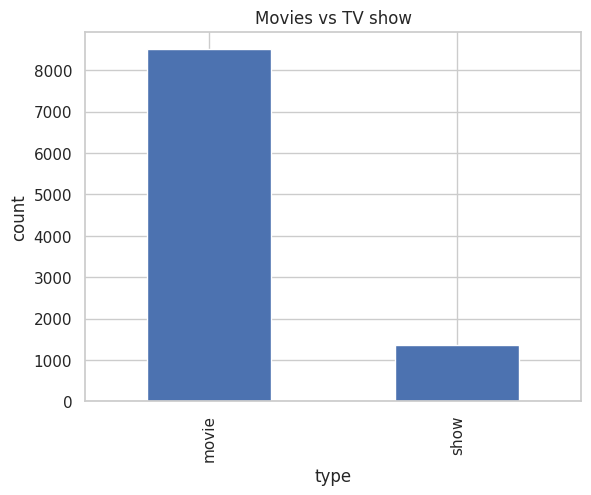

In [ ]:
# Count of Movies vs TV Shows
#basic plot
titles['type'].value_counts().plot(kind='bar',title='Movies vs TV show')
plt.ylabel('count')
plt.show()

**Advanced Plot (Matplotlib – Object-Oriented, Customizations):**

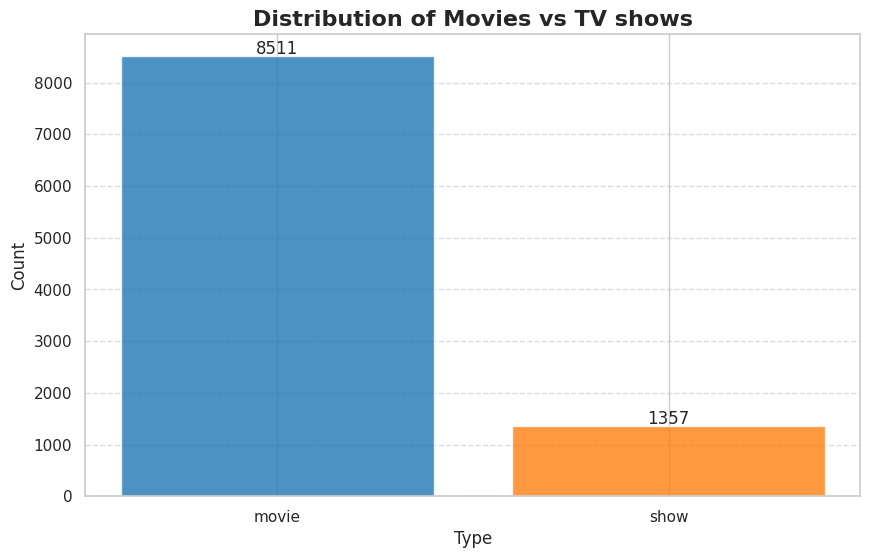

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
counts=titles['type'].value_counts()
colors = ['#1f77b4','#ff7f0e']

#bar plot
ax.bar(counts.index,counts.values,color=colors,alpha=0.8)

#Titles, labels, grid
ax.set_title('Distribution of Movies vs TV shows',fontsize=16,fontweight='bold')
ax.set_xlabel('Type',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.grid(axis='y',linestyle='--',alpha=0.7)

# Annotate bars
for i,v in enumerate(counts.values):
  ax.text(i,v+50,str(v),ha='center',fontsize=12)

plt.show()

## Top 10 Genres

**We analyze the most common genres using Plotly to provide interactive visualizations.**

In [37]:
import plotly.express as px

# Split genres, clean strings
all_genres = titles['genres'].dropna().str.split(',', expand=True).stack()
all_genres = all_genres.str.strip().str.replace('[\[\]\']','', regex=True)

# Top 10 genres
top_genres = all_genres.value_counts().head(10)
top_genres_plotly = top_genres.reset_index()
top_genres_plotly.columns = ['Genre','Count']

# Create interactive bar chart
fig = px.bar(top_genres_plotly, x='Genre', y='Count', color='Count',
             text='Count', color_continuous_scale='Viridis', title='Top 10 Genres (Interactive)')

# Show values outside bars
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

## Trends Over Time: Number of Titles by Year

**We explore how the number of titles has changed over the years.**

In [ ]:
year_counts = titles['release_year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Number_of_Titles']

# Interactive line plot
fig = px.line(year_counts, x='Year', y='Number_of_Titles', markers=True,
              title='Number of Titles Released Per Year')
fig.show()


## Ratings and Popularity

**We examine IMDb scores and highlight top-rated titles.**

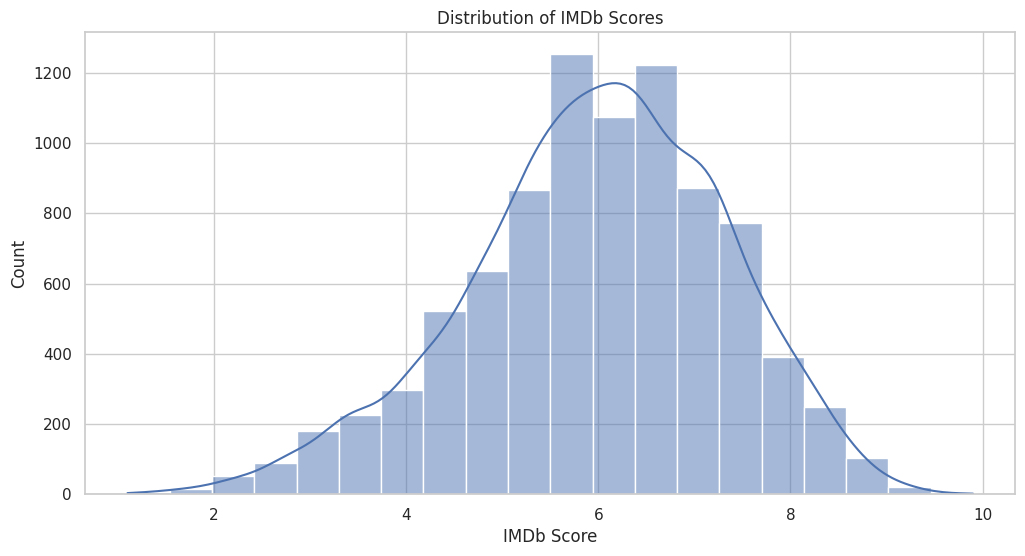

In [ ]:
plt.figure(figsize=(12,6))

sns.histplot(titles['imdb_score'].dropna(),bins=20,kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()

## Cast and Crew Analysis

**We identify the most prolific actors and directors on Amazon Prime.**

In [59]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2,
                    horizontal_spacing=0.2,
                    subplot_titles=("Top 10 Actors", "Top 10 Directors"))

# Left: Actors
fig.add_trace(
    go.Bar(x=top_actors['Number_of_Titles'], y=top_actors['Actor'],
           orientation='h', marker_color='skyblue', name='Actors'),
    row=1, col=1
)

# Right: Directors
fig.add_trace(
    go.Bar(x=top_directors['Number_of_Titles'], y=top_directors['Director'],
           orientation='h', marker_color='orange', name='Directors'),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Top 10 Actors and Directors",
                  yaxis1={'categoryorder':'total ascending'},
                  yaxis2={'categoryorder':'total ascending'})
fig.show()


## ADVANCED PLOTS FOR DEEPER INSIGHTS

**The following plots provide additional insights beyond basic EDA:**

## IMDb Score vs Runtime

**We examine the relationship between a title's runtime and its IMDb rating to see whether longer movies or episodes tend to receive higher ratings, while also comparing patterns between Movies and TV Shows.**


In [64]:
import plotly.express as px

# 1️⃣ Prepare the data
# Remove rows with missing values in IMDb votes or TMDB popularity
scatter_data = titles.dropna(subset=['imdb_votes','tmdb_popularity'])

# Optional: filter top 1000 titles by TMDB popularity to reduce clutter
scatter_data = scatter_data.nlargest(1000, 'tmdb_popularity')

# 2️⃣ Create the scatter plot
fig = px.scatter(
    scatter_data,
    x='imdb_votes',               # Number of IMDb votes on x-axis
    y='tmdb_popularity',          # TMDB popularity on y-axis
    color='type',                 # Color by Movie / TV Show
    size='imdb_score',            # Size indicates IMDb score
    hover_data=['title','genres','release_year'],  # Info on hover
    title='TMDB Popularity vs IMDb Votes',
    labels={'imdb_votes':'IMDb Votes', 'tmdb_popularity':'TMDB Popularity'},
    width=1000,
    height=600
)

# 3️⃣ Show the plot
fig.show()


## Top Genres

**We visualize the distribution of top genres interactively, showing which genres dominate Amazon Prime content.**

In [ ]:
# Split genres and clean
all_genres = titles[['type','genres']].dropna()
all_genres = all_genres.assign(genres=all_genres['genres'].str.split(','))
all_genres = all_genres.explode('genres')  # one row per genre
all_genres['genres'] = all_genres['genres'].str.strip().str.replace('[\[\]\']','', regex=True)

# Count titles per Type and Genre
genre_counts = all_genres.groupby(['type','genres']).size().reset_index(name='Count')

# Plot interactive treemap
fig = px.treemap(
    genre_counts,
    path=['type','genres'],  # Upper category = type, lower = genre
    values='Count',
    color='Count',
    color_continuous_scale='Viridis',
    title='Treemap of Genres by Type',
    height=900,
)
fig.show()